In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf 
import tensorflow.keras as kr 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout 

sns.set()
pd.set_option("chained_assignment", None)

In [2]:
data = pd.read_csv(r"ModelingAirQualityData.csv", index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7795
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               7796 non-null   object 
 1   CO(GT)             7796 non-null   float64
 2   PT08.S1(CO)        7796 non-null   float64
 3   NMHC(GT)           7796 non-null   float64
 4   C6H6(GT)           7796 non-null   float64
 5   PT08.S2(NMHC)      7796 non-null   float64
 6   NOx(GT)            7796 non-null   float64
 7   PT08.S3(NOx)       7796 non-null   float64
 8   NO2(GT)            7796 non-null   float64
 9   PT08.S4(NO2)       7796 non-null   float64
 10  PT08.S5(O3)        7796 non-null   float64
 11  Temp_c             7796 non-null   float64
 12  Relative_humidity  7796 non-null   float64
 13  Absolute_humidity  7796 non-null   float64
 14  day                7796 non-null   int64  
 15  Feb                7796 non-null   int64  
 16  Mar                7796 

In [3]:
data['night'] = 0
data.loc[data.day!=1, 'night'] = 1

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,night


In [4]:
# Split data into train and test sets
X = data.drop(columns=['Temp_c', 'Date'])
y = data[['Temp_c']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Scale traing data, then use the scaler fitted on training data to scaled the test set
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()


X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [6]:
# Create the NN model
tf.random.set_seed(42)
model = kr.Sequential()

model.add(Dense(32, input_shape=(25,), activation="relu"))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=kr.optimizers.Adam(), loss='mse')

model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
156/156 [==============================] - 2s 6ms/step - loss: 0.0440 - val_loss: 0.0081
Epoch 2/100
156/156 [==============================] - 1s 4ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 3/100
156/156 [==============================] - 1s 4ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 4/100
156/156 [==============================] - 1s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 5/100
156/156 [==============================] - 1s 4ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/100
156/156 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/100
156/156 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
156/156 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
156/156 [==============================] - 1s 4ms/step - loss: 9.2321e-04 - val_loss: 9.1649e-04
Epoch 10/100
156/156 [==============================] - 1s 4ms/step - loss: 8.0476e

In [7]:
history = model.history.history
history.keys()

dict_keys(['loss', 'val_loss'])

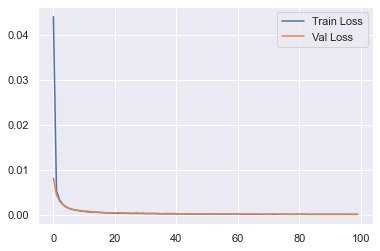

In [8]:
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [9]:
history['loss'][-1]

5.146581315784715e-05

In [11]:
pred = model.predict(X_test)
pred[:10]

49/49 [==============================] - 0s 2ms/step


array([[0.5551212 ],
       [0.14903167],
       [0.60501564],
       [0.55339813],
       [0.35237384],
       [0.15475106],
       [0.3720378 ],
       [0.3747143 ],
       [0.525044  ],
       [0.47415277]], dtype=float32)

In [13]:
y_test[:10]

array([[0.55483871],
       [0.15268817],
       [0.60860215],
       [0.5655914 ],
       [0.35913978],
       [0.15698925],
       [0.37419355],
       [0.37419355],
       [0.53333333],
       [0.46451613]])

<AxesSubplot:>

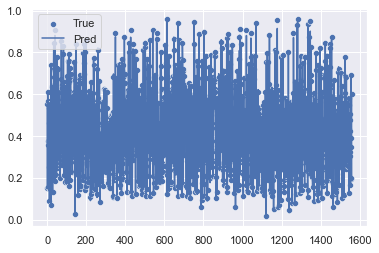

In [59]:
fig, ax = plt.subplots()
sns.scatterplot(x=list(range(len(y_test))), y=y_test[:, 0], ax=ax, label='True', palette='inferno')
sns.lineplot(x=list(range(len(pred))), y=pred[:, 0], ax=ax, label='Pred')

In [34]:
# Unscale data
unscaled_pred = y_scaler.inverse_transform(pred)
unscaled_y_test = y_scaler.inverse_transform(y_test)

In [36]:
unscaled_pred[:10]

array([[23.913134 ],
       [ 5.0299726],
       [26.233227 ],
       [23.833012 ],
       [14.485384 ],
       [ 5.2959247],
       [15.399758 ],
       [15.524215 ],
       [22.514547 ],
       [20.148104 ]], dtype=float32)

In [37]:
unscaled_y_test[:10]

array([[23.9],
       [ 5.2],
       [26.4],
       [24.4],
       [14.8],
       [ 5.4],
       [15.5],
       [15.5],
       [22.9],
       [19.7]])

In [39]:
r2_score(unscaled_y_test, unscaled_pred)

0.9981056907362676

In [40]:
mean_squared_error(unscaled_y_test, unscaled_pred)

0.15147372567362186

In [41]:
np.sqrt(mean_squared_error(unscaled_y_test, unscaled_pred))

0.3891962559861308

In [44]:
pd.Series(unscaled_y_test.flatten()).describe()

count    1560.000000
mean       18.051282
std         8.945043
min        -1.200000
25%        11.300000
50%        17.100000
75%        24.400000
max        42.800000
dtype: float64